Deep learning stuff

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
# # Create a resolver
# # Distribution strategies
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)

# strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "theroyakash" # username from the json file
os.environ['KAGGLE_KEY'] = "0c952bf9d48e02510ca5a7b61823f49b" # key from the json file
!kaggle datasets download -d theroyakash/adfexefe # api copied from kaggle

 99% 186M/189M [00:02<00:00, 72.9MB/s]
100% 189M/189M [00:02<00:00, 69.0MB/s]


In [5]:
!ls

adfexefe.zip  sample_data


In [0]:
from zipfile import ZipFile

with ZipFile('adfexefe.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [7]:
!ls

adfexefe.zip  Images  sample_data


In [9]:
os.getcwd()

'/content'

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---

In [0]:
# image_size = 100

# labels = {}

# for i in range(84):
#     labels[f'/content/Images/{i+1}'] = i

In [0]:
# training_data = []

# def make_training_data():
    
#     for label in labels:
        
#         for y in tqdm(os.listdir(label)):
            
#             try:
#                 path = os.path.join(label, y)
#                 img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#                 img = cv2.resize(img, (image_size, image_size))

#                 training_data.append([np.array(img), np.eye(84)[labels[label]]])
            
#             except Exception as e:
#                 print(e)
#                 pass

In [0]:
# make_training_data()

In [0]:
# np.random.shuffle(training_data)

In [0]:
# len(training_data)

In [0]:
# X = []
# y = []

# for features, label in training_data:
#     X.append(features)
#     y.append(label)

# X = np.array(X).reshape(-1, image_size, image_size, 1)

In [0]:
# X.shape

---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---
---

In [10]:
!ls

adfexefe.zip  Images  sample_data


In [110]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


TRAINING_DIR = "/content/Images"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=False) # Nope
    # fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(200,200),
	class_mode='categorical',
    batch_size = 200
)

Found 166105 images belonging to 84 classes.


In [0]:
def AKHCRNetV1():

    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 100 * 100 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3), padding='same'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(84, activation='softmax')
    ])

    return model

In [0]:
model = AKHCRNetV1()

In [113]:
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 25, 25, 128)     

In [0]:
# from tensorflow.keras.utils import plot_model
# plot_model(model , 'captcha_predictor.png' , show_shapes=True)

In [114]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=20, verbose = 1)

Epoch 1/100
20/20 [==============================] - 14s 684ms/step - loss: 4.2408 - accuracy: 0.0782
Epoch 2/100
20/20 [==============================] - 14s 687ms/step - loss: 2.8273 - accuracy: 0.3147
Epoch 3/100
20/20 [==============================] - 14s 690ms/step - loss: 2.0384 - accuracy: 0.4860
Epoch 4/100
20/20 [==============================] - 14s 689ms/step - loss: 1.6933 - accuracy: 0.5523
Epoch 5/100
20/20 [==============================] - 14s 691ms/step - loss: 1.5284 - accuracy: 0.5987
Epoch 6/100
20/20 [==============================] - 14s 689ms/step - loss: 1.4235 - accuracy: 0.6255
Epoch 7/100
20/20 [==============================] - 14s 689ms/step - loss: 1.3495 - accuracy: 0.6380
Epoch 8/100
20/20 [==============================] - 14s 690ms/step - loss: 1.2394 - accuracy: 0.6678
Epoch 9/100
20/20 [==============================] - 14s 688ms/step - loss: 1.2280 - accuracy: 0.6752
Epoch 10/100
20/20 [==============================] - 14s 688ms/step - loss: 1.170

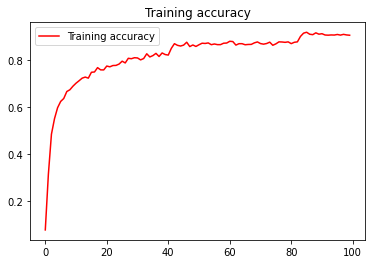

<Figure size 432x288 with 0 Axes>

In [115]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [91]:
from google.colab import files
files.upload()

Saving Screen Shot 2020-05-02 at 7.47.14 PM.png to Screen Shot 2020-05-02 at 7.47.14 PM.png


{'Screen Shot 2020-05-02 at 7.47.14 PM.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00d\x00\x00\x00d\x08\x06\x00\x00\x00p\xe2\x95T\x00\x00\x01AiCCPICC Profile\x00\x00(\x91c``\x12H,(\xc8aa``\xc8\xcd+)\nrwR\x88\x88\x8cR`\x7f\xc2\xc0\xca\xc0\xc8\xc0\xc3 \xc7 \x99\x98\\\\\xe0\x18\x10\xe0\x03T\xc2\x00\xa3Q\xc1\xb7k@\xb5@pY\x17d\xd6\xc3C3DX\x1f\xe5_\x9cS\xf4c\x92\xf5<s1L\xf5(\x80+%\xb58\x19H\xff\x01\xe2\xa4\xe4\x82\xa2\x12\x06\x06\xc6\x04 [\xb9\xbc\xa4\x00\xc4n\x01\xb2E\x8a\x80\x8e\x02\xb2g\x80\xd8\xe9\x10\xf6\x1a\x10;\t\xc2>\x00V\x13\x12\xe4\x0cd_\x01\xb2\x05\x923\x12S\x80\xec\'@\xb6N\x12\x92x:\x12\x1bj/\x08px\x04(\x18\x19\xa5\x16\x13p*\xe9\xa0$\xb5\xa2\x04D;\xe7\x17T\x16e\xa6g\x94(8\x02C(U\xc13/YOG\xc1\xc8\xc0\xc8\x80\x81\x01\x14\xde\x10\xd5\x9f\xcf\x83\xc3\x91Q"\t!\x96*\xcd\xc0`\xbc\x02(\xc8\x89\x10\xcb\x92c`\xd8\xbd\x8e\x81Ap:BL}.\xd0K\xab\x18\x18\x0e\xf4\x14$\x16%\xc2\x1d\xc0\xf8\x8d\xa58\xcd\xd8\x08\xc2\xe6\x91b``=\xf0\xff\xff\xa7\xff\x0c\x0c\xec\xc00\xfe{\xee\xff\xff\xdf3\xfe\

In [93]:
!ls

 adfexefe.zip		 sample_data
 captcha_predictor.png	'Screen Shot 2020-05-02 at 7.38.20 PM.png'
 Images			'Screen Shot 2020-05-02 at 7.47.14 PM.png'


In [0]:
import cv2

img1 = cv2.imread('/content/Screen Shot 2020-05-02 at 7.38.20 PM.png')
img2 = cv2.imread('/content/Screen Shot 2020-05-02 at 7.47.14 PM.png')

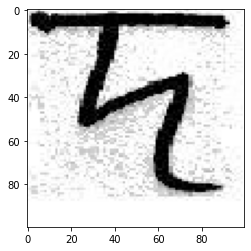

In [117]:
import matplotlib.pyplot as plt
plt.imshow(img1)

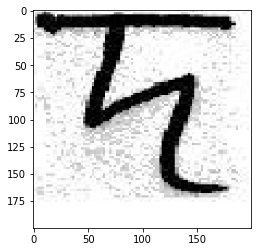

In [123]:
plt.imshow(resized1)

In [0]:
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

x = image.img_to_array(resized1)
x = np.expand_dims(x, axis=0)

images1 = np.vstack([x])

In [124]:
model.predict(images1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [0]:
x = image.img_to_array(img2)
x = np.expand_dims(x, axis=0)

images2 = np.vstack([x])